### Configurable Variables
Variables that can be modified in this notebook
- `input_data` — path to the input folder containing the dataset
- `supress_warnings` — boolean flag to enable/disable warning messages (`True`/`False`)
---
**Set following variables if you are running notebook interactively.**

In [33]:
from Identification_of_SVGs import qval_map, fsv_thr

input_path_folder_default = "somde_results/SN124_A551763_Rep2/"
expr_counts_path = "output_datasets/SN124_A551763_Rep2/count.not_normalized.csv"
suppress_warnings_default = False

### Load variables from CMD

In [34]:
SUPPRESS_WARNINGS = None
try:
    if suppress_warnings == "True":
        SUPPRESS_WARNINGS = True
    else:
        SUPPRESS_WARNINGS = False
except NameError:
    SUPPRESS_WARNINGS = suppress_warnings_default

## Suppress Warnings (Optional)

* Suppress warnings for cleaner output.
* Comment out the line below if warnings are desired for debugging.

In [35]:
# Suppress warnings for cleaner output
import warnings
import os

if SUPPRESS_WARNINGS:
    print("Ignoring warnings.")
    warnings.filterwarnings('ignore')

### Environment setup

1. Install the necessary packages using `pip` if they are not already installed:

In [36]:
!pip install matplotlib pandas numpy ipywidgets --quiet
%matplotlib inline


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


2. Import necessary libraries:

In [37]:
# Import of libraries for working with spatial transcriptomics data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as w
from IPython.display import display
import os
import sys

3. load the dataset
  * **Option 1**: Import data directly from Google Drive (requires Google Colab).
  * **Option 2**: Load dataset path from CMD.

In [38]:
# OPTION 1
# from google.colab import drive
# drive.mount('/content/drive')

In [39]:
# OPTION 2
DATA_PATH = None
try:
    DATA_PATH = input_data_folder
except NameError:
    DATA_PATH = input_path_folder_default

if DATA_PATH is None or not os.path.exists(DATA_PATH):
    print("ERROR: Datapath (", DATA_PATH ,") not found.")
    sys.exit()

print("Using input path:", DATA_PATH)

DATA_FOLDER_NAME = DATA_PATH.split("/")[-2].strip()
output_dir = os.path.join("figures/show/somde/" + DATA_FOLDER_NAME)
os.makedirs(output_dir, exist_ok=True)

Using input path: somde_results/SN124_A551763_Rep2/


# SOMDE vizualizations

### Load data

In [40]:
result = pd.read_csv(DATA_PATH + "/somde_result.csv")
result

,Unnamed: 0,FSV,M,g,l,max_delta,max_ll,max_mu_hat,max_s2_t_hat,model,n,s2_FSV,s2_logdelta,time,BIC,max_ll_null,LLR,pval,qval
0,11065,5.511178e-01,4,MMP3,61.707222,7.909723e-01,-1044.511718,-5.246721,1.361814e+00,SE,1093,0.000041,7.790803e-04,0.001008,2117.010161,-1348.588848,304.077130,0.00000,0.00000
1,11609,9.759404e-01,4,CXCL5,444.793340,1.150848e-02,-880.569069,-1.675924,2.317587e+01,SE,1093,0.000042,5.781146e-02,0.001294,1789.124864,-1162.742327,282.173258,0.00000,0.00000
2,11608,8.816468e-01,4,CXCL1,444.793340,6.266700e-02,-793.669400,-4.516115,3.801846e+00,SE,1093,0.001435,1.183083e-01,0.000996,1615.325525,-1041.409860,247.740460,0.00000,0.00000
3,10772,3.855311e-01,4,S100A7,61.707222,1.547797e+00,-368.098799,-2.494971,2.715701e-01,SE,1093,0.000047,9.530301e-04,0.001021,764.184324,-599.911153,231.812354,0.00000,0.00000
4,11607,9.631216e-01,4,CXCL8,444.793340,1.787491e-02,-922.648878,-2.786315,1.626595e+01,SE,1093,0.000060,3.729753e-02,0.002720,1873.284483,-1150.061289,227.412410,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12608,426,2.060876e-09,4,MCM6,0.000061,4.851652e+08,-45.719984,-0.530214,7.106556e-10,SE,1093,33.512926,5.713260e+18,0.000766,119.426694,-45.720213,0.000229,0.98793,0.98793
12609,2515,2.060876e-09,4,RPS15,0.000061,4.851652e+08,-799.694873,-3.911575,3.205788e-08,SE,1093,32.376978,5.519604e+18,0.000536,1627.376471,-799.695101,0.000229,0.98793,0.98793
12610,1859,2.060876e-09,4,TMED2,0.000061,4.851652e+08,-785.143891,-3.748463,2.946888e-08,SE,1093,30.523472,5.203620e+18,0.000583,1598.274509,-785.144120,0.000229,0.98793,0.98793
12611,908,2.060876e-09,4,ATP6V0E1,0.000061,4.851652e+08,-450.994262,-1.877938,7.544415e-09,SE,1093,26.024777,4.436686e+18,0.000490,929.975251,-450.994491,0.000229,0.98793,0.98793


In [41]:
ndf = pd.read_csv("somde_results/" + DATA_FOLDER_NAME + '/ndf.csv', header=None)       # node-level meta-expression
ndf

,0,1,2,3,4,5,6,7,8,9,...,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092
0,0.0,1.0,2.0,3.0,4.0,5.00,6.00,7.0,8.0,9.0,...,1083.0,1084.0,1085.0,1086.0,1087.0,1088.0,1089.0,1090.0,1091.0,1092.0
1,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12586,1.0,1.0,6.0,6.0,5.0,2.00,3.25,5.0,3.0,12.0,...,15.0,3.0,5.0,4.0,8.0,13.0,10.0,3.0,4.0,8.0
12587,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
12588,7.0,4.0,5.0,7.0,2.0,7.50,5.50,4.0,0.0,8.0,...,36.0,3.0,3.0,3.0,13.0,13.0,6.0,2.0,3.0,3.0
12589,1.0,0.0,0.0,1.0,0.0,0.00,0.75,1.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0


In [42]:
ninfo = pd.read_csv("somde_results/" + DATA_FOLDER_NAME + '/ninfo.csv') # SOM node coordinates (x, y)
ninfo

,x,y,total_count
0,731.0000,166.0000,1244.0
1,757.0000,166.0000,1184.0
2,782.0000,166.0000,1805.0
3,808.0000,166.0000,1142.0
4,839.5000,177.0000,1419.0
...,...,...,...
1088,871.0000,1520.0000,4203.0
1089,909.0000,1453.0000,3185.0
1090,979.5000,1686.0000,1026.0
1091,1005.7358,1728.3768,1428.0


### Volkano plot
Plot shows the relation between significance and effect size. Efect size is the fraction of variance explained by spatial variation.

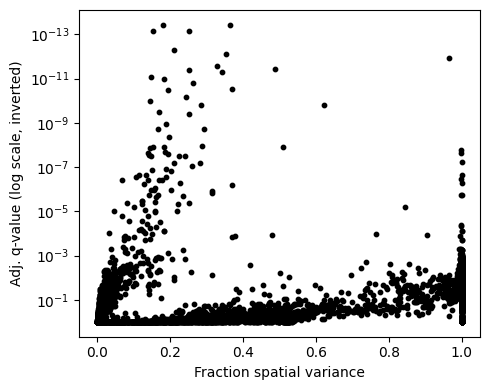

In [43]:
# Filter out non-positive q-values
plot_data = result[result['qval'] > 0]

plt.figure(figsize=(5, 4))
plt.scatter(plot_data['FSV'], plot_data['qval'], c='black', s=10)
plt.yscale('log')
plt.gca().invert_yaxis()
plt.xlabel('Fraction spatial variance')
plt.ylabel('Adj. q-value (log scale, inverted)')
plt.tight_layout()
plt.show()


### Volkano plot with colored SVGs

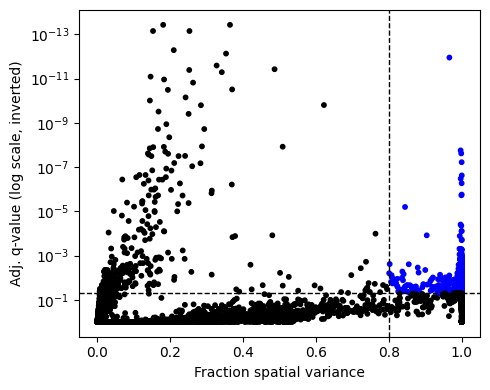

In [44]:
import matplotlib.pyplot as plt

# Filter out non-positive q-values
plot_data = result[result['qval'] > 0]

# Define colors based on the condition
colors = ['blue' if (row['FSV'] >= 0.8 and row['qval'] <= 0.05) else 'black'
          for _, row in plot_data.iterrows()]

plt.figure(figsize=(5, 4))
plt.scatter(plot_data['FSV'], plot_data['qval'], c=colors, s=10)
plt.yscale('log')
plt.gca().invert_yaxis()
plt.axhline(0.05, c='black', lw=1, ls='--')
plt.axvline(0.8, c='black', lw=1, ls='--')
plt.xlabel('Fraction spatial variance')
plt.ylabel('Adj. q-value (log scale, inverted)')
plt.tight_layout()
plt.show()

In [45]:
print("number of spatially variable (blue):", colors.count('blue'))

sv_data = pd.read_csv(DATA_PATH + '/SVnum.csv')
print("Number of spatially variable detected by SOMDE:", sv_data['SVnum'].iloc[0])

number of spatially variable (blue): 5528
Number of spatially variable detected by SOMDE: 5893


### Top SVGs bar plot

In [65]:
# ============================================================
# 1) SELECT STRICT SVG GENES (TOP ~20 FROM VOLCANO)
# ============================================================

# Thresholds used to define "strict" SVGs
llr_thr = 0.9
q_thr = 0.05
fsv_thr = 0.9

# Boolean mask for top-right volcano area
mask_top_right = (result['LLR'] >= llr_thr) & (result['qval'] <= q_thr)

# Select genes, sort by q-value, keep TOP 20 most significant
strict_gene_list = (
    result.loc[mask_top_right, ['g', 'qval']]
           .dropna()
           .sort_values('qval')
           .drop_duplicates(subset='g')
           .head(20)['g']
           .tolist()
)

print(f"Number of strict SVG candidates: {len(strict_gene_list)}")
print(strict_gene_list)

# Map gene → q-value for plotting
qval_map = result.set_index('g')['qval'].to_dict()

Number of strict SVG candidates: 20
['MMP3', 'CSF2', 'IGKC', 'MMP12', 'IGLC3', 'IL11', 'IL1RN', 'COL1A2', 'IL6', 'SOD2', 'COL1A1', 'MT2A', 'MALAT1', 'AGR2', 'COL7A1', 'SPP1', 'S100P', 'IGLC7', 'INHBA', 'TFF3']


### SOM node Heatmaps for each gene

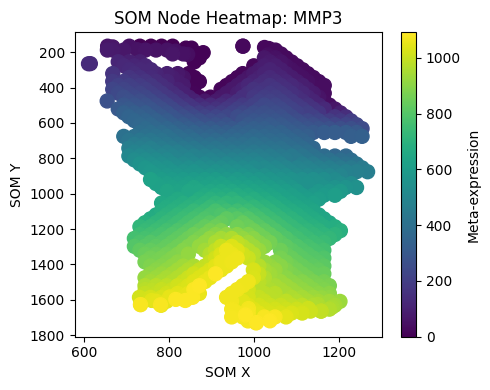

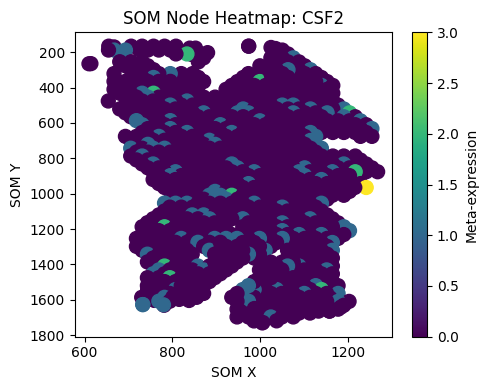

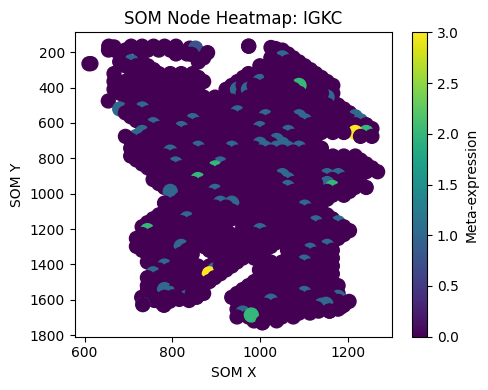

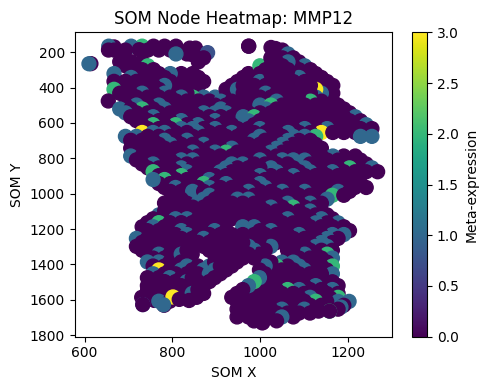

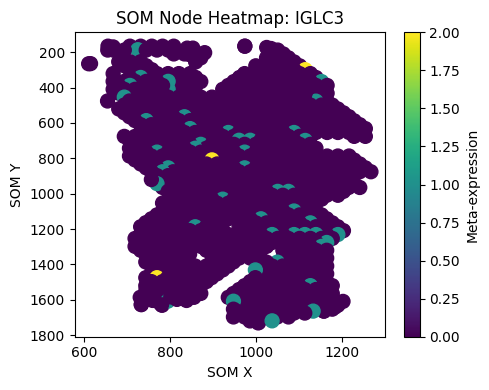

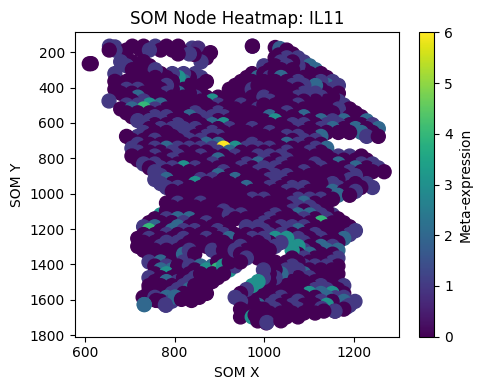

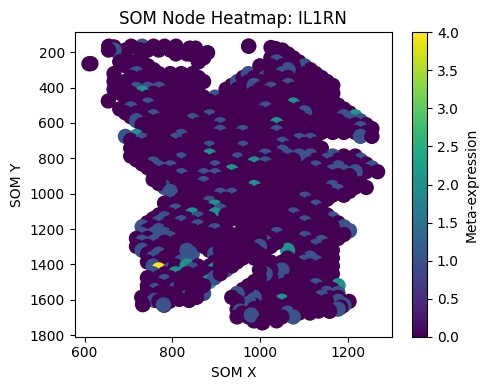

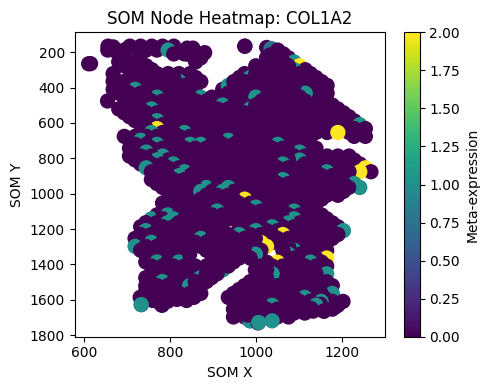

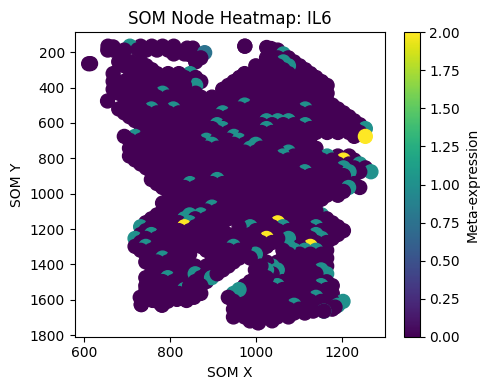

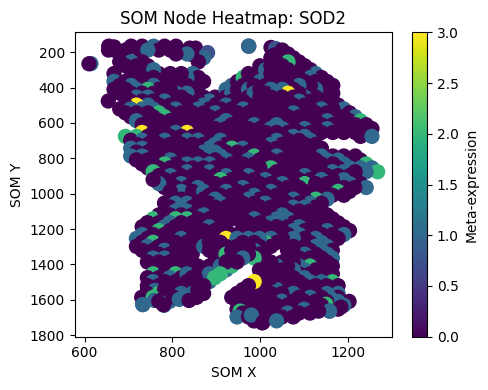

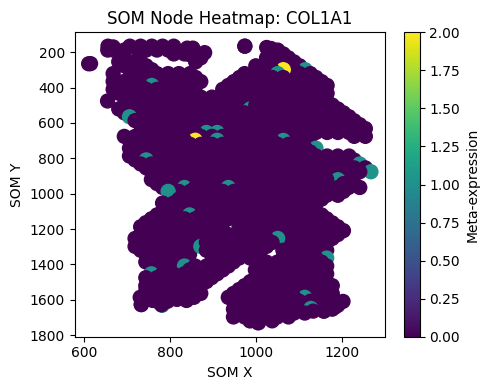

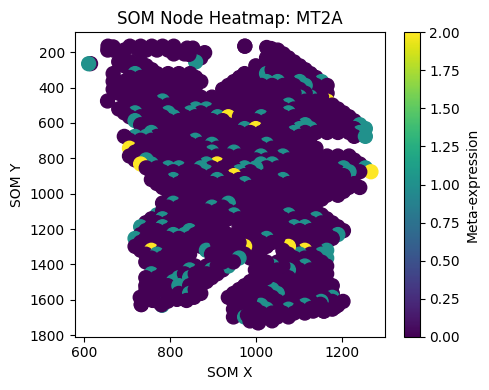

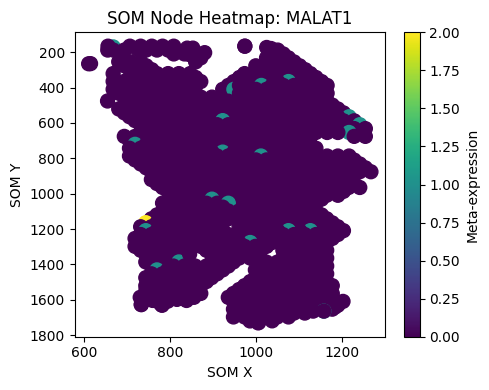

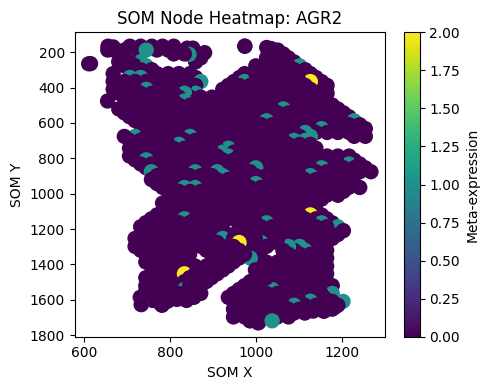

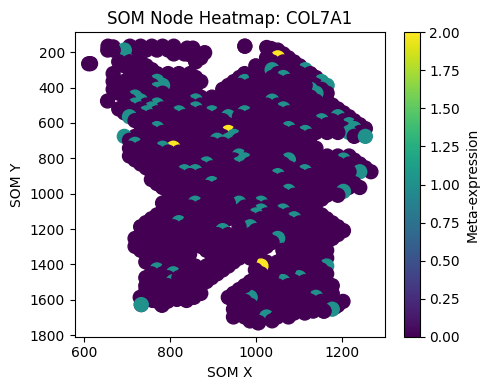

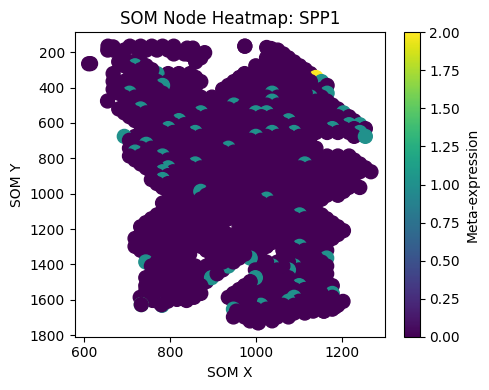

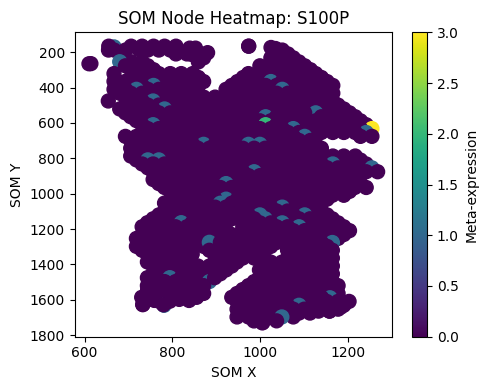

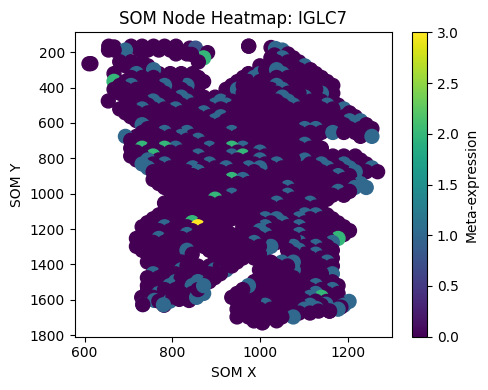

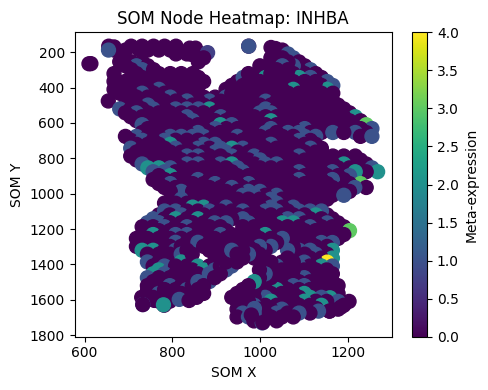

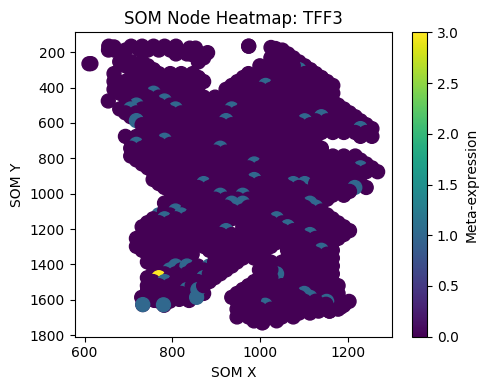

In [66]:
# Choose top genes by FSV and/or qval
top_genes = strict_gene_list

# Plot SOM node heatmap for each top gene
for gene in top_genes:
    # Find gene index
    gene_idx = result[result['g'] == gene].index[0]

    # Meta-expression for this gene
    meta_expr = ndf.iloc[gene_idx].values  # shape = num_nodes

    # Node coordinates
    x_coords = ninfo["x"].values
    y_coords = ninfo["y"].values

    # Plot heatmap
    plt.figure(figsize=(5, 4))
    sc = plt.scatter(x_coords, y_coords, c=meta_expr, cmap='viridis', s=100)
    plt.colorbar(sc, label='Meta-expression')
    plt.title(f'SOM Node Heatmap: {gene}')
    plt.xlabel('SOM X')
    plt.ylabel('SOM Y')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


Manual SVG inspection

In the previous step you have looked at spatial expression maps for these genes.
Now you can use the barplots below to visually (by eye) distinguish:

  • likely TRUE SVGs – genes with:
      - high fraction_expressing (expressed in a reasonable fraction of spots)
      - high FSV (large fraction of spatial variance)
      - high LLR and very low q-value
      - stable, non-extreme parameter estimates (e.g. max_delta, max_mu_hat)
  • likely FALSE SVGs – genes that were called significant by the method,
    but probably represent noise or technical artifacts:
      - very low fraction_expressing (signal driven by a few spots)
      - modest FSV with noisy/patchy spatial pattern
      - borderline LLR / q-values
      - unstable or extreme parameter estimates in model selection

This code cell is intended to help you identify which output variables
(FSV, fraction_expressing, LLR, qval, and model-selection parameters)
are most useful to filter out likely FALSE SVGs

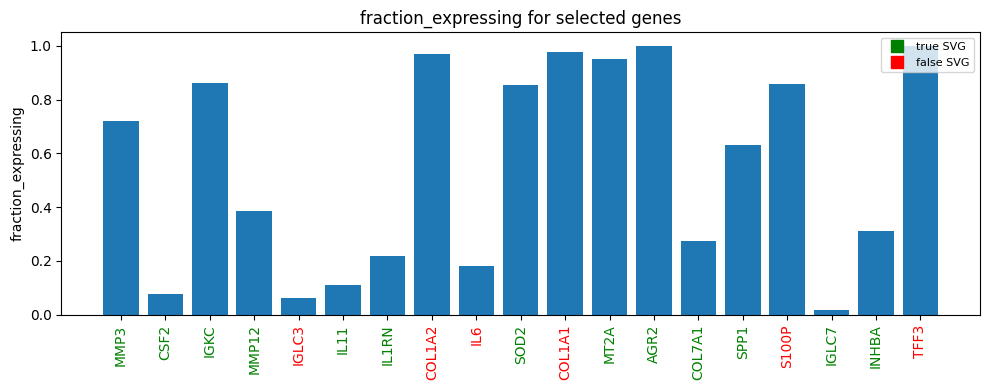

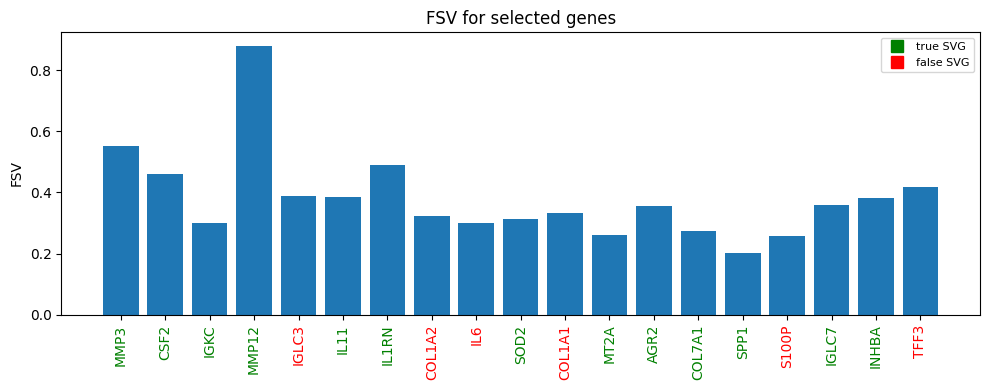

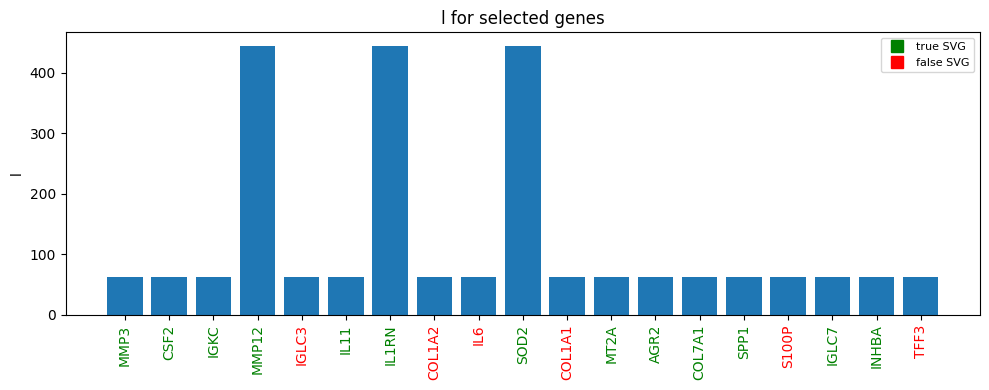

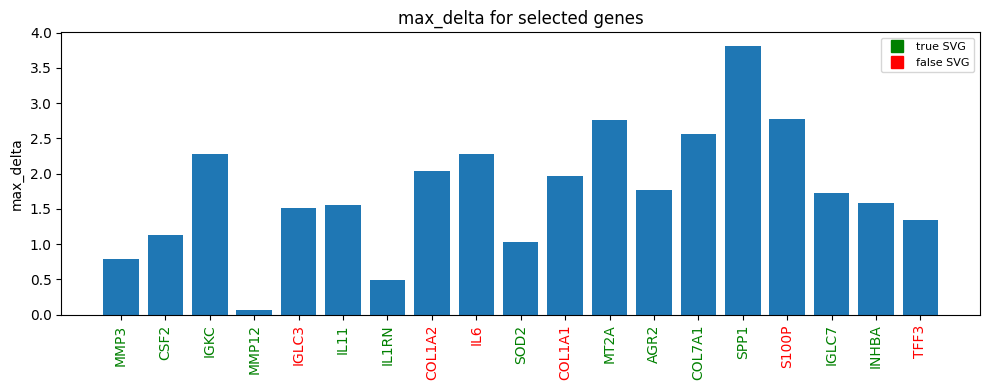

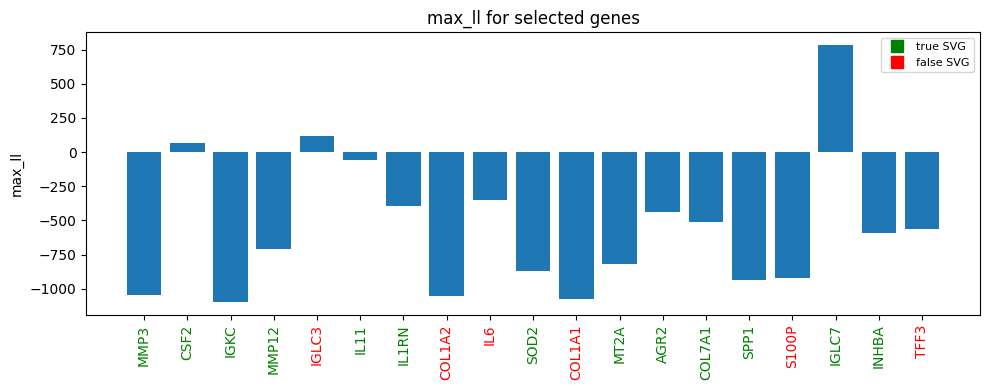

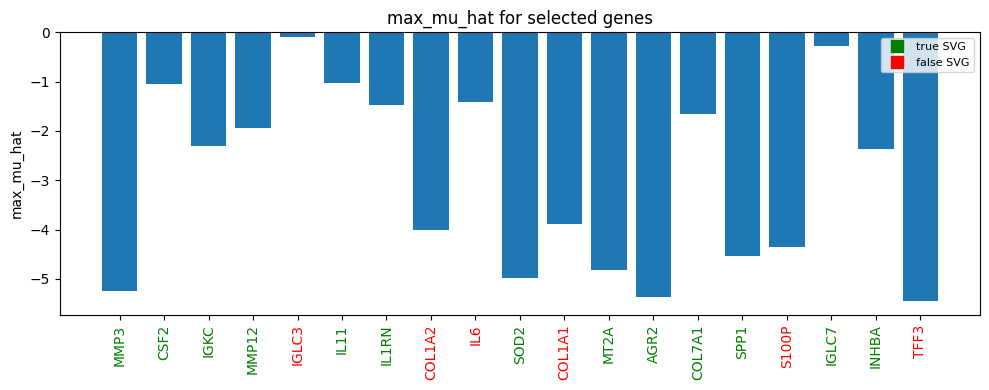

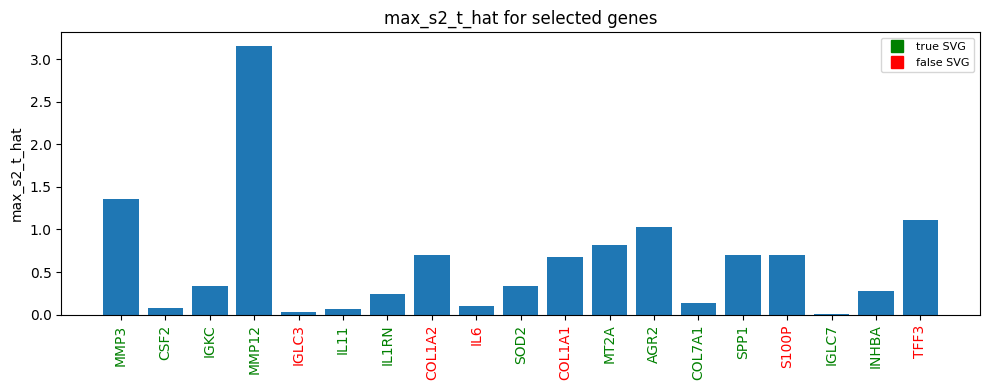

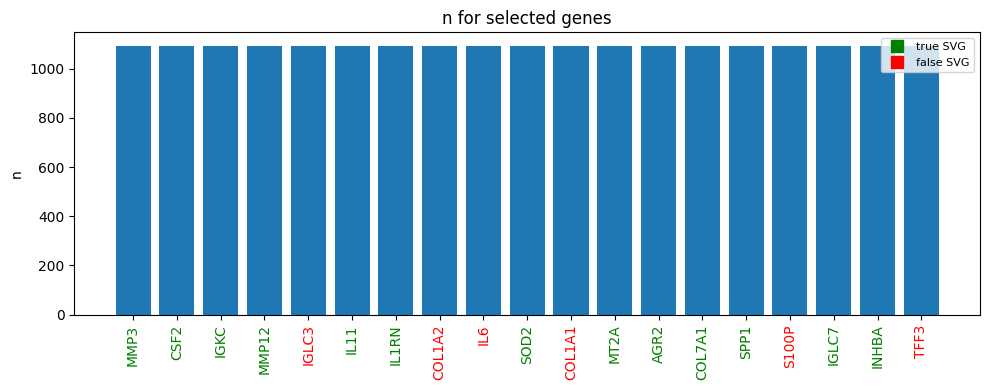

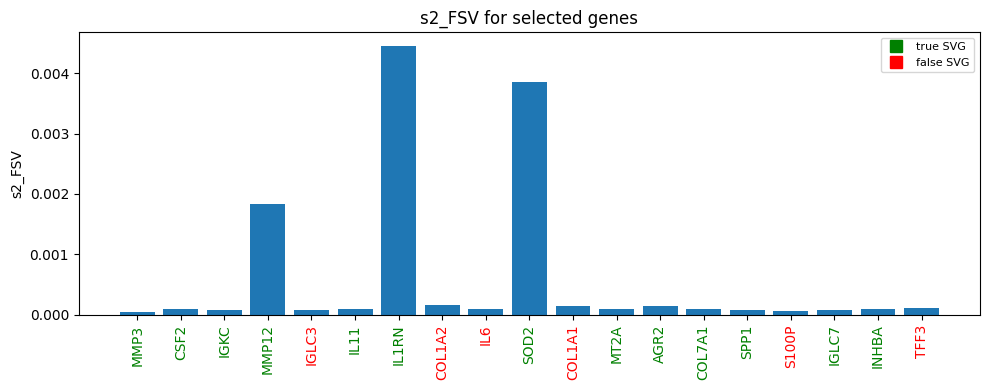

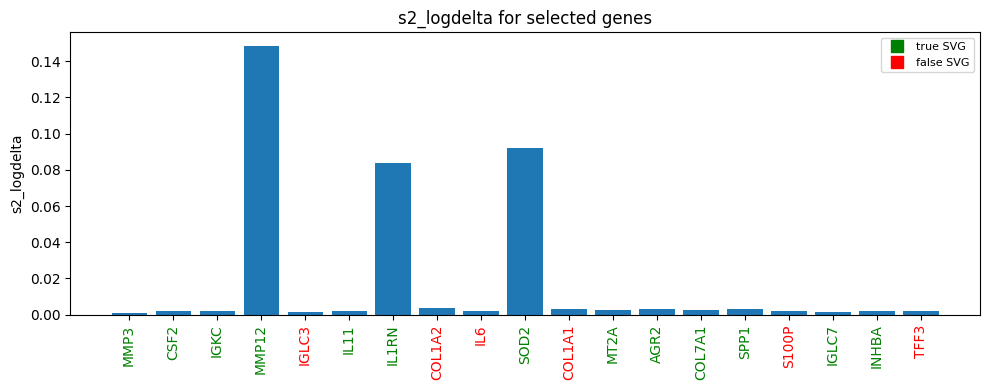

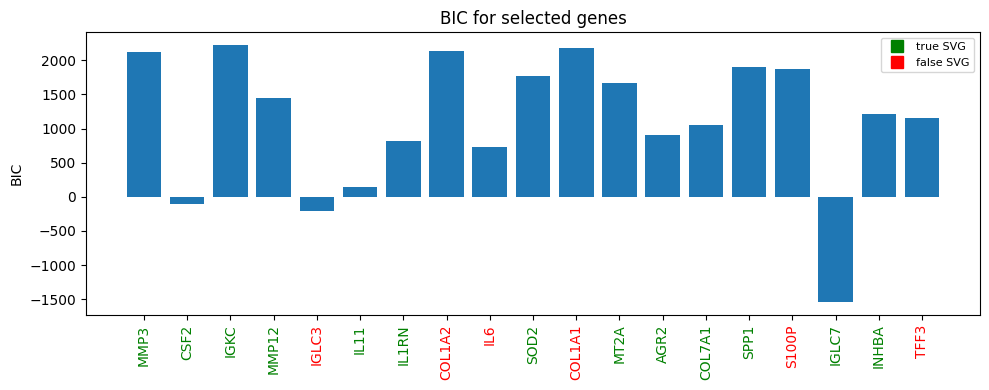

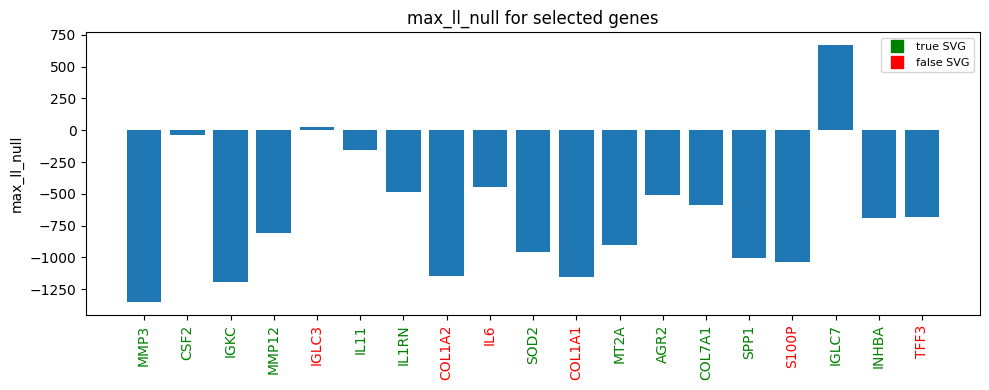

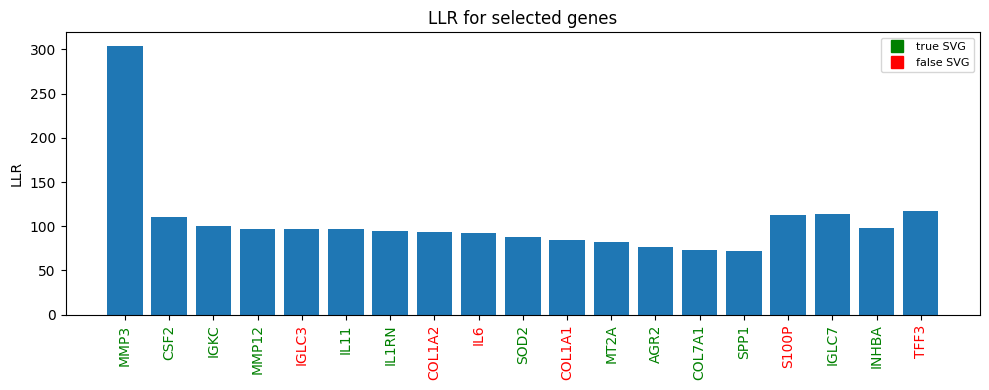

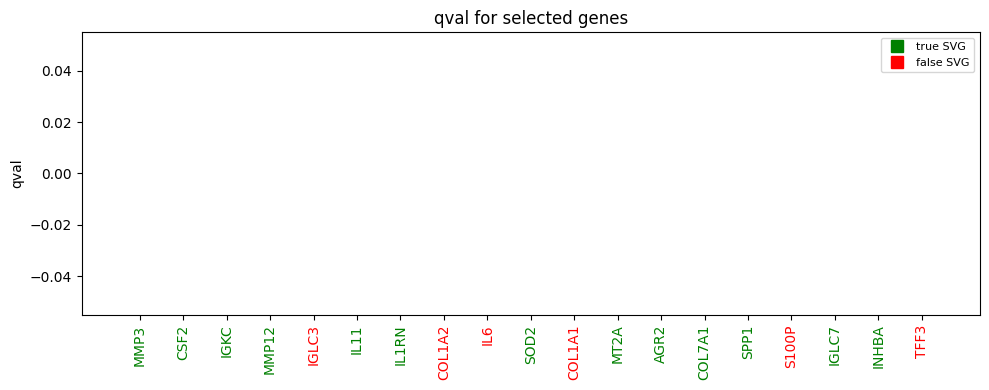

In [68]:
# ============================================================
# 0) SHORT INSTRUCTION FOR THE USER
# ============================================================
instruction_text = """
Manual SVG inspection

In the previous step you have looked at spatial expression maps for these genes.
Now you can use the barplots below to visually (by eye) distinguish:

  • likely TRUE SVGs – genes with:
      - high fraction_expressing (expressed in a reasonable fraction of spots)
      - high FSV (large fraction of spatial variance)
      - high LLR and very low q-value
      - stable, non-extreme parameter estimates (e.g. max_delta, max_mu_hat)
  • likely FALSE SVGs – genes that were called significant by the method,
    but probably represent noise or technical artifacts:
      - very low fraction_expressing (signal driven by a few spots)
      - modest FSV with noisy/patchy spatial pattern
      - borderline LLR / q-values
      - unstable or extreme parameter estimates in model selection

This code cell is intended to help you identify which output variables
(FSV, fraction_expressing, LLR, qval, and model-selection parameters)
are most useful to filter out likely FALSE SVGs while keeping TRUE SVGs.

In the plots below:
  • TRUE SVGs are marked in GREEN
  • FALSE SVGs are marked in RED

Use these summaries together with the spatial maps from the previous cell.
The classification into TRUE and FALSE SVGs should always be based on the
spatial expression maps you inspected visually before running this cell.
"""
print(instruction_text)


# ============================================================
# 1) DEFINE GENE SETS
# ============================================================

# Manually curated TRUE SVGs (based on spatial maps from previous cell)
true_svg_genes = ['MMP3', 'CSF2', 'IGKC', 'MMP12', 'IL11', 'IL1RN', 'SOD2', 'MT2A', 'AGR2', 'COL7A1', 'SPP1', 'IGLC7', 'INHBA']

# All genes of interest (TRUE + FALSE SVG candidates)
genes_of_interest = ['MMP3', 'CSF2', 'IGKC', 'MMP12', 'IGLC3', 'IL11', 'IL1RN', 'COL1A2', 'IL6', 'SOD2', 'COL1A1', 'MT2A', 'AGR2', 'COL7A1', 'SPP1', 'S100P', 'IGLC7', 'INHBA', 'TFF3']

# All other genes in this list are treated as FALSE SVGs
false_svg_genes = [g for g in genes_of_interest if g not in true_svg_genes]

# ============================================================
# 2) ENSURE fraction_expressing IS AVAILABLE IN `results`
# ============================================================

if "fraction_expressing" not in result.columns:
    # Raw (non-normalized) count matrix
    counts = pd.read_csv(expr_counts_path, index_col=0)  # rows = spots, cols = genes

    # Keep only genes which are present both in `results` and in the count matrix
    common_genes = [g for g in result["g"] if g in counts.columns]
    counts = counts[common_genes]

    # Fraction of spots with expression > 0
    fraction_expressing = (counts > 0).sum(axis=0) / counts.shape[0]

    # Align to results['g'] order
    frac_series = fraction_expressing.reindex(result["g"])
    result["fraction_expressing"] = frac_series.values

# ============================================================
# 3) SUBSET `results` TO GENES OF INTEREST AND ORDER THEM
# ============================================================

sub = result[result["g"].isin(genes_of_interest)].copy()

# Preserve the order defined in genes_of_interest
sub["gene_order"] = sub["g"].map({g: i for i, g in enumerate(genes_of_interest)})
sub = sub.sort_values("gene_order")

# Add label TRUE/FALSE SVG
sub["svg_label"] = np.where(sub["g"].isin(true_svg_genes), "true", "false")

# X-axis positions and labels
x_pos = np.arange(len(sub))
gene_labels = sub["g"].tolist()

# ============================================================
# 4) VARIABLES TO PLOT (INCLUDING fraction_expressing)
# ============================================================

vars_to_plot = [
    "fraction_expressing",  # added
    "FSV",
    "l",
    "max_delta",
    "max_ll",
    "max_mu_hat",
    "max_s2_t_hat",
    "n",
    "s2_FSV",
    "s2_logdelta",
    "BIC",
    "max_ll_null",
    "LLR",
    "qval"
]

# Output folder
base_dir = os.path.dirname(input_path_folder_default)
os.makedirs(base_dir, exist_ok=True)

# Color mapping for gene labels
label_colors = {
    "true": "green",
    "false": "red"
}

# ============================================================
# 5) LOOP OVER VARIABLES AND DRAW BARPLOTS
#    with GREEN labels for true SVGs and RED for false SVGs
# ============================================================

for var in vars_to_plot:
    if var not in sub.columns:
        print(f"Variable '{var}' not found in results columns – skipped.")
        continue

    values = sub[var].values

    plt.figure(figsize=(10, 4))
    plt.bar(x_pos, values)

    plt.xticks(x_pos, gene_labels, rotation=90)
    plt.ylabel(var)
    plt.title(f"{var} for selected genes")

    # Color x-axis tick labels according to TRUE/FALSE SVG status
    ax = plt.gca()
    for tick, gene in zip(ax.get_xticklabels(), gene_labels):
        if gene in true_svg_genes:
            tick.set_color("green")
        else:
            tick.set_color("red")

    # Legend for true / false SVG
    true_patch = plt.Line2D([0], [0], color="green", marker="s", linestyle="None",
                            markersize=8, label="true SVG")
    false_patch = plt.Line2D([0], [0], color="red", marker="s", linestyle="None",
                             markersize=8, label="false SVG")
    ax.legend(handles=[true_patch, false_patch], loc="upper right", fontsize=8)

    plt.tight_layout()

    # Save figure
    out_path = os.path.join(base_dir, f"genes_of_interest_{var}.png")
    plt.savefig(out_path, dpi=300, bbox_inches="tight")
    plt.show()